# CS584 Machine Learning Fall 2022

Illinois Institute of Technology <br>
Prof. Yan Yan (yyan34@iit.edu) <br>
TA. Izzet Yildirim (iyildirim@hawk.iit.edu)

In [104]:
from IPython.display import Image

## Intro to PyTorch

* Based on the Torch library, PyTorch is one of the most popular deep learning frameworks
* Things that make PyTorch popular are
  * It's ease of use, 
  * Dynamic computational graph, 
  * And the fact that it feels more "Pythonic"
* PyTorch vs TensorFlow [[Reference](https://www.assemblyai.com/blog/pytorch-vs-tensorflow-in-2022/)]
  * PyTorch is popular among researchers / TensorFlow is the established one (although losing popularity)
  * New papers mostly use PyTorch / Mostly Google uses TensorFlow for research 
  * New models are mostly for PyTorch / Again, Google produces most models for TensorFlow
  * PyTorch is easy to debug / TensorFlow needs additional work for proper debugging
  * PyTorch has smaller ecosystem compared to TensorFlow
  * Keras is more high-level and readable than both

### Installing PyTorch

In [ ]:
# Install the PyTorch package (along with NumPy)
! pip install numpy torch --disable-pip-version-check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Import PyTorch module
import torch

# Check PyTorch version 
torch.__version__

'1.12.1+cu113'

### Tensor

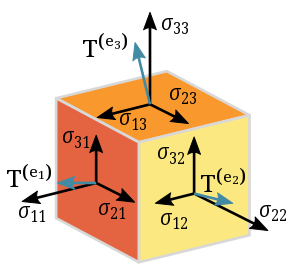

In [106]:
Image(filename='figures/tensor.png') 

* The central component of PyTorch is the tensor data structure
* They are similar to NumPy ndarray type
* They are CUDA-capable - built to run with GPUs where possible

#### Using Tensors

**Creating Tensors**

In [ ]:
A = [[6, 9, 2],
     [3, 3, 7],
     [1, 0, 3]]
     
A_tensor = torch.tensor(A)

A_tensor

tensor([[6, 9, 2],
        [3, 3, 7],
        [1, 0, 3]])

**Bridge with NumPy**

In [ ]:
import numpy as np

B = np.array([0,1,2,3])

print(B)

B_tensor = torch.from_numpy(B)

print(B_tensor)

[0 1 2 3]
tensor([0, 1, 2, 3])


**Specialized Initializers** [[All Initializers](https://pytorch.org/docs/stable/torch.html#creation-ops)]

We can initialize tensors with random values, all ones, or all zeroes by providing a `shape`:

In [ ]:
C = torch.zeros(4,4) 

C

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
D = torch.ones(3,3,2, dtype=torch.int)

D

tensor([[[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]],

        [[1, 1],
         [1, 1],
         [1, 1]]], dtype=torch.int32)

To generate a new tensor with the same shape of an existing tensor, we can use initializer methods with `{method}_like`:

In [ ]:
A_tensor_zeros = torch.zeros_like(A_tensor)

A_tensor_zeros 

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])

In [ ]:
A_tensor_rand = torch.rand_like(A_tensor, dtype=torch.float) 

A_tensor_rand

tensor([[0.9603, 0.5936, 0.6299],
        [0.3601, 0.6853, 0.5194],
        [0.8739, 0.3547, 0.7844]])

Accessing the attributes of a tensor:

In [ ]:
print("dtype:", A_tensor_rand.dtype)
print("shape:", A_tensor_rand.shape)

dtype: torch.float32
shape: torch.Size([3, 3])


**Indexing and Slicing**

In [ ]:
E_tensor = torch.ones(4, 4)
print(f"First row: {E_tensor[0]}")
print(f"First column: {E_tensor[:, 0]}")
print(f"Last column: {E_tensor[..., -1]}")
E_tensor[:,1] = 0
print(E_tensor)

First row: tensor([1., 1., 1., 1.])
First column: tensor([1., 1., 1., 1.])
Last column: tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


**Arithmetic Operations**

In [ ]:
r = (torch.rand(2, 2) - 0.5) * 2 # values between -1 and 1
print('A random matrix, r:')
print(r)

# Common mathematical operations are supported:
print('\nAbsolute value of r:')
print(torch.abs(r))

# ...as are trigonometric functions:
print('\nInverse sine of r:')
print(torch.asin(r))

# ...and linear algebra operations like determinant and singular value decomposition
print('\nDeterminant of r:')
print(torch.det(r))
print('\nSingular value decomposition of r:')
print(torch.svd(r))

# ...and statistical and aggregate operations:
print('\nAverage and standard deviation of r:')
print(torch.std_mean(r))
print('\nMaximum value of r:')
print(torch.max(r))

A random matrix, r:
tensor([[ 0.8400, -0.0440],
        [-0.7893, -0.4645]])

Absolute value of r:
tensor([[0.8400, 0.0440],
        [0.7893, 0.4645]])

Inverse sine of r:
tensor([[ 0.9973, -0.0440],
        [-0.9096, -0.4830]])

Determinant of r:
tensor(-0.4249)

Singular value decomposition of r:
torch.return_types.svd(
U=tensor([[-0.6703,  0.7421],
        [ 0.7421,  0.6703]]),
S=tensor([1.1912, 0.3567]),
V=tensor([[-0.9644,  0.2646],
        [-0.2646, -0.9644]]))

Average and standard deviation of r:
(tensor(0.7057), tensor(-0.1144))

Maximum value of r:
tensor(0.8400)


In [ ]:
# This computes the matrix multiplication between two tensors. y1, y2, y3 will have the same value
y1 = E_tensor @ E_tensor.T
y2 = E_tensor.matmul(E_tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(E_tensor, E_tensor.T, out=y3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [ ]:
# This computes the element-wise product. z1, z2, z3 will have the same value
z1 = E_tensor * E_tensor
z2 = E_tensor.mul(E_tensor)

z3 = torch.rand_like(E_tensor)
torch.mul(E_tensor, E_tensor, out=z3)

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])

### Datasets and DataLoader

* PyTorch has a number of datasets included in the package
* PyTorch provides two data primitives: `torch.utils.data.DataLoader` and `torch.utils.data.Dataset`
* They can be used to prototype and benchmark your model

#### Built-in Datasets

* The `torchvision` package consists of popular datasets, model architectures, and common image transformations for computer vision
* The `torchtext` package consists of data processing utilities and popular datasets for natural language
* The `torchaudio` package provides I/O, signal and data processing functions, datasets, model implementations

In [ ]:
# Install dataset packages
! pip install torchvision torchdata torchtext torchaudio --disable-pip-version-check

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import torch
import torchvision
from torchvision.datasets import FashionMNIST # torchvision for image datasets
from torchtext.datasets import AmazonReviewFull # torchtext for text
from torchaudio.datasets import SPEECHCOMMANDS #torchaudio for audio

#### Sample Data Loading

The `train` argument determines whether the returned data is for training or testing

In [ ]:
DATA_DIR = "datasets"

fashion_training_data = FashionMNIST(
    # the directory you want to store the dataset, can be a string e.g. "data"
    root = DATA_DIR, 
    # if set to False, will give you the test set instead
    train = True, 
    # download the dataset if it's not already available in the root path you specified
    download = True, 
    # as the name implies, will transform images to tensor data structures so PyTorch can use them for training
    transform = torchvision.transforms.ToTensor() 
)

fashion_test_data = FashionMNIST(
    # the directory you want to store the dataset, can be a string e.g. "data"
    root = DATA_DIR, 
    # if set to False, will give you the test set instead
    train = False, 
    # download the dataset if it's not already available in the root path you specified
    download = True, 
    # as the name implies, will transform images to tensor data structures so PyTorch can use them for training
    transform = torchvision.transforms.ToTensor() 
)

In [ ]:
# Classes in the dataset
fashion_training_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

**Visualize Data**

In [ ]:
# Install Matplotlib package
! pip install matplotlib --disable-pip-version-check

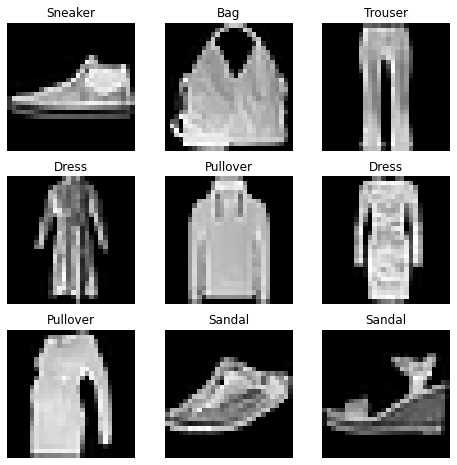

In [ ]:
import matplotlib.pyplot as plt

fashion_label_map = {index:label for index, label in enumerate(fashion_training_data.classes)}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(fashion_training_data), size=(1,)).item()
    img, label = fashion_training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(fashion_label_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## ML with PyTorch

### CIFAR-10 Image Classification [[Source](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html)]

* CIFAR10 has the following classes:
  * airplane
  * automobile
  * bird
  * cat
  * deer
  * dog
  * frog
  * horse
  * ship
  * truck
* The images are 3-channel color images of 32x32 pixels in size

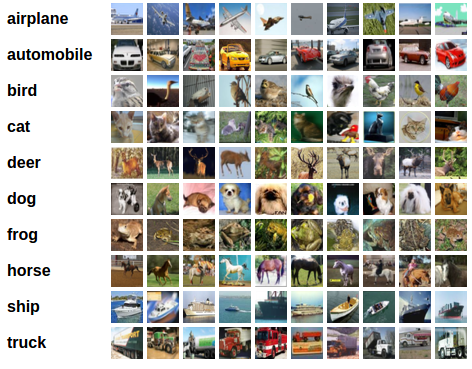

In [107]:
Image(filename='figures/cifar10.png') 

#### Training an image classifier 

We will do the following steps in order:

* Load and normalize the CIFAR10 training and test datasets using torchvision
* Define a Neural Network
* Define a loss function
* Train the network on the training data
* Test the network on the test data

**Load CIFAR10 dataset**

In [ ]:
import torch
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import CIFAR10
from torchvision.transforms import Compose, Normalize, ToTensor

cifar_transform = Compose(
    [ToTensor(),
        Normalize((0.5, 0.5, 0.5),  # mean
    (0.5, 0.5, 0.5))] # std. deviation
)

cifar_batch_size = 4

cifar_train_data = CIFAR10(
    root = DATA_DIR,
    train = True, # train set, 50k images
    download = True,
    transform = cifar_transform
)
cifar_test_data = CIFAR10(
    root = DATA_DIR,
    train = False, # test set, 10k images
    download = True,
    transform = cifar_transform
)

cifar_train_dataloader = DataLoader(
    cifar_train_data,
    batch_size = cifar_batch_size, # how many samples per batch to load
    shuffle = True # set to True to have the data reshuffled at every epoch
)
cifar_test_dataloader = DataLoader(
    cifar_test_data,
    batch_size = cifar_batch_size,
    shuffle = True
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
for X, y in cifar_train_dataloader:
  print(f"Shape of X [N, C, H, W]: {X.shape}")
  print(f"Shape of y: {y.shape} {y.dtype}")
  break

Shape of X [N, C, H, W]: torch.Size([4, 3, 32, 32])
Shape of y: torch.Size([4]) torch.int64


**Visualize Samples**

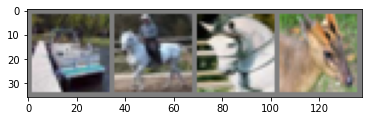

ship - horse - horse - deer


In [ ]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# get some random training images
cifar_train_dataiter = iter(cifar_train_dataloader)
images, labels = cifar_train_dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' - '.join(f'{cifar_train_data.classes[labels[j]]}' for j in range(cifar_batch_size)))

#### Define a Neural Network

* A subclass of the PyTorch `nn.Module`, which is the base class for all neural network modules in PyTorch
* A 32x32 tensor in each of the 3 RGB color channels
* Our flatten method will output a linear layer with 3072 (32 x 32 x 3) nodes
* The activation function is `ReLu` [[The Most Popular Activation Function](https://towardsdatascience.com/understanding-relu-the-most-popular-activation-function-in-5-minutes-459e3a2124f)]

In [ ]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"

DEVICE

'cuda'

In [110]:
import torch.nn as nn

class CifarNet(nn.Module):

    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(32*32*3, 1024), # a 32x32 tensor in each of the 3 RGB color channels
            nn.ReLU(),
            nn.Linear(1024, 512),
            nn.ReLU(),
            nn.Linear(512, 10) # 10 classes in our dataset
        )

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear_relu_stack(x)
        return x


cifar_net = CifarNet().to(DEVICE)

print(cifar_net)

CifarNet(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=3072, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


CNN Version: https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-convolutional-neural-network

#### Define a Loss function and optimizer

Use a Classification Cross-Entropy loss and SGD with momentum

In [ ]:
import torch.optim as optim

cifar_loss = nn.CrossEntropyLoss()
cifar_optimizer = optim.SGD(cifar_net.parameters(), lr=0.001, momentum=0.9)

#### Define the Training function

* Loop over our data iterator, and feed the inputs to the network and optimize
* We'll iterate through each mini-batch (remember `batch_size` from above?)
* For the backprop step, we need to run `optimizer.zero_grad()` first (Instead of setting to zero, set the grads to None)
* `loss.backward()` uses the loss to compute the gradient, then we use `optimizer.step()` to update the weights
* Finally, print out updates to the training process, outputting the computed loss after every 2000 training samples

In [ ]:
def cifar_train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(DEVICE), y.to(DEVICE)
        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        if batch % 2000 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

#### Define the Test function

* It is nice to evaluate our model after every epoch and output the accuracy on the test set
* We use `model.eval()` to set the model into testing mode
* `torch.no_grad()` will disable gradient calculation
* Finally, we calculate the average loss for the test set and the overall accuracy

In [ ]:
def cifar_test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(DEVICE), y.to(DEVICE)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f"accuracy: {(100*correct):>0.1f}%, loss: {test_loss:>8f}")

#### Train the Network

In [ ]:
EPOCHS = 10

for t in range(EPOCHS):
    print(f"Epoch {t+1}\n-------------------------------")
    cifar_train(cifar_train_dataloader, cifar_net, cifar_loss, cifar_optimizer)
    cifar_test(cifar_train_dataloader, cifar_net, cifar_loss)

Epoch 1
-------------------------------
loss: 2.290113  [    0/50000]
loss: 1.582353  [ 8000/50000]
loss: 2.206872  [16000/50000]
loss: 1.131538  [24000/50000]
loss: 1.012462  [32000/50000]
loss: 1.330745  [40000/50000]
loss: 0.455819  [48000/50000]
accuracy: 50.1%, loss: 1.420240


#### Saving and Loading a Model

**Save the model into a file**

In [109]:
CIFAR_MODEL_PATH = 'models/cifar10.pth' # For GPU

torch.save(cifar_net.state_dict(), CIFAR_MODEL_PATH)

**Load model from file**

In [ ]:
cifar_net = CifarNet()
cifar_net.load_state_dict(torch.load(CIFAR_MODEL_PATH))

#### Evaluate the Model

Let's first see a sample from the test dataset

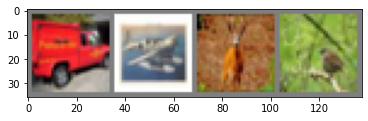

Expected: truck - airplane - deer - bird


In [ ]:
cifar_test_dataiter = iter(cifar_test_dataloader)
images, labels = cifar_test_dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('Expected:', ' - '.join(f'{cifar_test_data.classes[labels[j]]}' for j in range(4)))

In [ ]:
outputs = cifar_net(images)
_, predicted = torch.max(outputs, 1)

print('Predicted:', ' - '.join(f'{cifar_test_data.classes[predicted[j]]}' for j in range(4)))

Predicted: truck - ship - deer - deer


**Overall accuracy:**

In [ ]:
correct = 0
total = 0

with torch.no_grad():
   for data in cifar_test_dataloader:
     images, labels = data
     outputs = cifar_net(images)
     _, predicted = torch.max(outputs.data, 1)
     total += labels.size(0)
     correct += (predicted == labels).sum().item()
     
print(f'Model accuracy: {100 * correct // total} %')

Model accuracy: 53 %


**See how it performs for each class:**

In [ ]:
cifar_correct_pred = {classname: 0 for classname in cifar_test_data.classes}
cifar_total_pred = {classname: 0  for classname in cifar_test_data.classes}

with torch.no_grad():
  for data in cifar_test_dataloader:
    images, labels = data
    outputs = cifar_net(images)
    _, predictions = torch.max(outputs, 1)
    for label,prediction in zip(labels, predictions):
      if label == prediction:
        cifar_correct_pred[cifar_test_data.classes[label]] += 1
      cifar_total_pred[cifar_test_data.classes[label]] += 1

for classname, correct_count in cifar_correct_pred.items():
  accuracy = 100 * float(correct_count) / cifar_total_pred[classname]
  print(f'Accuracy for class {classname}: {accuracy:.1f}%')

Accuracy for class airplane: 61.4%
Accuracy for class automobile: 61.0%
Accuracy for class bird: 46.5%
Accuracy for class cat: 46.4%
Accuracy for class deer: 36.8%
Accuracy for class dog: 40.3%
Accuracy for class frog: 60.9%
Accuracy for class horse: 56.0%
Accuracy for class ship: 63.0%
Accuracy for class truck: 61.1%


It shows that deers, cats and birds were difficult for the network to classify

### AG News Text Classification [[Source](https://pytorch.org/tutorials/beginner/text_sentiment_ngrams_tutorial.html)]

#### Load Dataset

In [ ]:
from torchtext.datasets import AG_NEWS

ag_train_iter = iter(AG_NEWS(split='train'))

next(ag_train_iter)

(3,
 "Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\\band of ultra-cynics, are seeing green again.")

In [ ]:
next(ag_train_iter)

(3,
 'Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\\which has a reputation for making well-timed and occasionally\\controversial plays in the defense industry, has quietly placed\\its bets on another part of the market.')

In [ ]:
next(ag_train_iter)

(3,
 "Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\\about the economy and the outlook for earnings are expected to\\hang over the stock market next week during the depth of the\\summer doldrums.")

#### Prepare Data Processing Pipelines

* A typical NLP data processing with tokenizer and vocabulary
* The first step is to build a vocabulary with the raw training dataset

In [ ]:
from torchtext.data.utils import get_tokenizer
from torchtext.vocab import build_vocab_from_iterator

ag_tokenizer = get_tokenizer('basic_english')
ag_train_iter = AG_NEWS(split='train')

def ag_yield_tokens(data_iter):
    for _, text in data_iter:
        yield ag_tokenizer(text)

ag_vocab = build_vocab_from_iterator(ag_yield_tokens(ag_train_iter), specials=["<unk>"])
ag_vocab.set_default_index(ag_vocab["<unk>"])

The vocabulary block converts a list of tokens into integers:

In [ ]:
ag_vocab(['here', 'is', 'an', 'example'])

[475, 21, 30, 5297]

* Prepare the text processing pipeline with the tokenizer and vocabulary
* The text and label pipelines will be used to process the raw data strings from the dataset iterators

In [ ]:
ag_text_pipeline = lambda x: ag_vocab(ag_tokenizer(x))
ag_label_pipeline = lambda x: int(x) - 1

ag_text_pipeline('here is an example')

[475, 21, 30, 5297]

#### Define `DataLoader`

* `collate_fn` function works on a batch of samples generated from `DataLoader`
* The input to `collate_fn` is a batch of data with the batch size in `DataLoader`

In [ ]:
def collate_batch(batch):
    label_list, text_list, offsets = [], [], [0]
    for (_label, _text) in batch:
         label_list.append(ag_label_pipeline(_label))
         processed_text = torch.tensor(ag_text_pipeline(_text), dtype=torch.int64)
         text_list.append(processed_text)
         offsets.append(processed_text.size(0))
    label_list = torch.tensor(label_list, dtype=torch.int64)
    offsets = torch.tensor(offsets[:-1]).cumsum(dim=0)
    text_list = torch.cat(text_list)
    return label_list.to(DEVICE), text_list.to(DEVICE), offsets.to(DEVICE)

ag_train_iter = AG_NEWS(split='train')
ag_train_dataloader = DataLoader(
  ag_train_iter, 
  batch_size=8, 
  shuffle=False, 
  collate_fn=collate_batch
)

#### Define the Model

In [ ]:
class AgTextClassificationModel(nn.Module):

    def __init__(self, vocab_size, embed_dim, num_class):
        super(AgTextClassificationModel, self).__init__()
        self.embedding = nn.EmbeddingBag(vocab_size, embed_dim, sparse=True)
        self.fc = nn.Linear(embed_dim, num_class)
        self.init_weights()

    def init_weights(self):
        initrange = 0.5
        self.embedding.weight.data.uniform_(-initrange, initrange)
        self.fc.weight.data.uniform_(-initrange, initrange)
        self.fc.bias.data.zero_()

    def forward(self, text, offsets):
        embedded = self.embedding(text, offsets)
        return self.fc(embedded)

ag_train_iter = AG_NEWS(split='train')
ag_num_class = len(set([label for (label, text) in ag_train_iter]))
ag_vocab_size = len(ag_vocab)
ag_embed_dim = 64
ag_model = AgTextClassificationModel(ag_vocab_size, ag_embed_dim, ag_num_class).to(DEVICE)

ag_model

AgTextClassificationModel(
  (embedding): EmbeddingBag(95811, 64, mode=mean)
  (fc): Linear(in_features=64, out_features=4, bias=True)
)

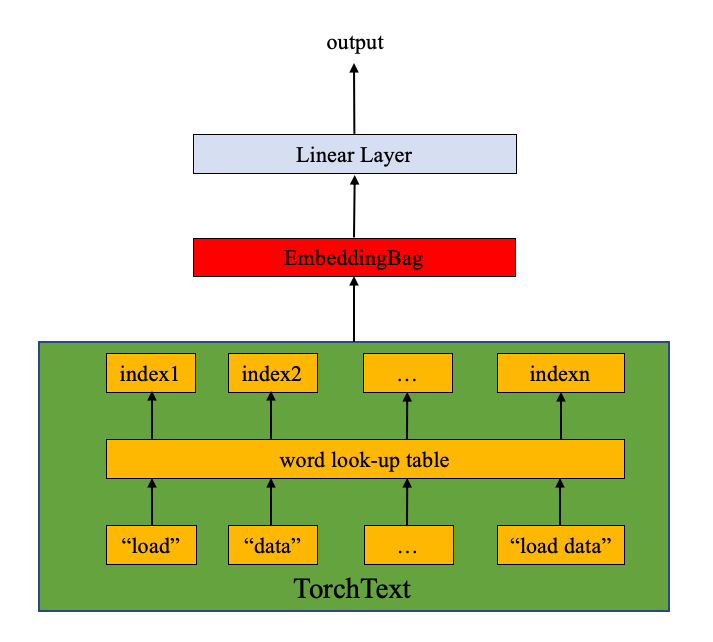

In [108]:
Image(filename='figures/agnews.png') 

In [ ]:
import time

ag_loss = nn.CrossEntropyLoss()
ag_optimizer = optim.SGD(ag_model.parameters(), lr=5)
ag_scheduler = optim.lr_scheduler.StepLR(ag_optimizer, 1.0, gamma=0.1)

def train(dataloader):
    ag_model.train()
    total_acc, total_count = 0, 0
    log_interval = 500
    start_time = time.time()

    for idx, (label, text, offsets) in enumerate(dataloader):
        ag_optimizer.zero_grad()
        predicted_label = ag_model(text, offsets)
        loss = ag_loss(predicted_label, label)
        loss.backward()
        torch.nn.utils.clip_grad_norm_(ag_model.parameters(), 0.1)
        ag_optimizer.step()
        total_acc += (predicted_label.argmax(1) == label).sum().item()
        total_count += label.size(0)
        if idx % log_interval == 0 and idx > 0:
            elapsed = time.time() - start_time
            print('| {:5d}/{:5d} batches '
                  '| accuracy {:8.3f}'.format(idx, len(dataloader),
                                              total_acc/total_count))
            total_acc, total_count = 0, 0
            start_time = time.time()

def evaluate(dataloader):
    ag_model.eval()
    total_acc, total_count = 0, 0

    with torch.no_grad():
        for idx, (label, text, offsets) in enumerate(dataloader):
            predicted_label = ag_model(text, offsets)
            loss = ag_loss(predicted_label, label)
            total_acc += (predicted_label.argmax(1) == label).sum().item()
            total_count += label.size(0)
    return total_acc/total_count

In [ ]:
from torch.utils.data.dataset import random_split
from torchtext.data.functional import to_map_style_dataset

BATCH_SIZE = 64
EPOCHS = 10

total_accu = None
train_iter, test_iter = AG_NEWS()
train_dataset = to_map_style_dataset(train_iter)
test_dataset = to_map_style_dataset(test_iter)
num_train = int(len(train_dataset) * 0.95)
split_train_, split_valid_ = \
    random_split(train_dataset, [num_train, len(train_dataset) - num_train])

train_dataloader = DataLoader(split_train_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
valid_dataloader = DataLoader(split_valid_, batch_size=BATCH_SIZE,
                              shuffle=True, collate_fn=collate_batch)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                             shuffle=True, collate_fn=collate_batch)

for epoch in range(1, EPOCHS + 1):
    print(f"Epoch {epoch}")
    print('-' * 59)
    epoch_start_time = time.time()
    train(train_dataloader)
    accu_val = evaluate(valid_dataloader)
    if total_accu is not None and total_accu > accu_val:
      ag_scheduler.step()
    else:
       total_accu = accu_val
    print('| time: {:5.2f}s | '
          'valid accuracy {:8.3f} '.format(time.time() - epoch_start_time,
                                           accu_val))
    print('-' * 59)

Epoch 1
-----------------------------------------------------------
|   500/ 1782 batches | accuracy    0.679
|  1000/ 1782 batches | accuracy    0.856
|  1500/ 1782 batches | accuracy    0.875
| time:  7.35s | valid accuracy    0.866 
-----------------------------------------------------------
Epoch 2
-----------------------------------------------------------
|   500/ 1782 batches | accuracy    0.900
|  1000/ 1782 batches | accuracy    0.902
|  1500/ 1782 batches | accuracy    0.902
| time:  7.27s | valid accuracy    0.889 
-----------------------------------------------------------
Epoch 3
-----------------------------------------------------------
|   500/ 1782 batches | accuracy    0.916
|  1000/ 1782 batches | accuracy    0.917
|  1500/ 1782 batches | accuracy    0.917
| time:  7.26s | valid accuracy    0.892 
-----------------------------------------------------------
Epoch 4
-----------------------------------------------------------
|   500/ 1782 batches | accuracy    0.926
| 

#### Evaluate the Model

In [ ]:
print('Checking the results of test dataset.')
accu_test = evaluate(test_dataloader)
print('test accuracy {:8.3f}'.format(accu_test))

Checking the results of test dataset.
test accuracy    0.909


#### Test on a Random News

In [ ]:
ag_news_label = {1: "World",
                 2: "Sports",
                 3: "Business",
                 4: "Sci/Tec"}

def predict(text, text_pipeline):
    with torch.no_grad():
        text = torch.tensor(text_pipeline(text))
        output = ag_model(text, torch.tensor([0]))
        return output.argmax(1).item() + 1

ex_text_str = "Tua Tagovailoa stumbled to the ground, his legs wobbly and unable to walk to the huddle after banging his head Sunday. And then Thursday night, he was carried off the field by stretcher after another hit caused his head to violently slam against the turf and his hands to freeze up."

ag_model = ag_model.to("cpu")

print("This is a %s news" %ag_news_label[predict(ex_text_str, ag_text_pipeline)])

This is a Sports news
